In [ ]:
import pandas as pd

In [ ]:
df_bps = pd.read_excel('pengangguran.xlsx')

In [ ]:
df_bps.head(6)

,Tingkat Pendidikan,Tahun 2021,Tahun 2022
0,Tidak/Belum Pernah Sekolah/Belum Tamat & Tamat SD,3.61,3.59
1,SMP,6.45,5.95
2,SMA umum,9.09,8.57
3,SMA Kejuruan,11.13,9.42
4,Diploma I/II/III,5.87,4.59
5,Universitas,5.98,4.80


# **NULL VALUES**

In [ ]:
# DETECTING
df_bps.isnull().sum()

Tingkat Pendidikan     0
Tahun 2021             0
Tahun 2022             0
dtype: int64

In [ ]:
df_bps.isnull().sum()

Tingkat Pendidikan     0
Tahun 2021             0
Tahun 2022             0
dtype: int64

In [ ]:
# Mengapus Baris Nilai NULL
df_bps.dropna()

,Tingkat Pendidikan,Tahun 2021,Tahun 2022
0,Tidak/Belum Pernah Sekolah/Belum Tamat & Tamat SD,3.61,3.59
1,SMP,6.45,5.95
2,SMA umum,9.09,8.57
3,SMA Kejuruan,11.13,9.42
4,Diploma I/II/III,5.87,4.59
5,Universitas,5.98,4.80


In [ ]:
# Mengisi Baris Nilai NULL
#Hanya mengira median untuk kolom numerik --> penambahan numeric_only =  true
val = df_bps.median(numeric_only=True).values[0]
df_bps.fillna(val)

,Tingkat Pendidikan,Tahun 2021,Tahun 2022
0,Tidak/Belum Pernah Sekolah/Belum Tamat & Tamat SD,3.61,3.59
1,SMP,6.45,5.95
2,SMA umum,9.09,8.57
3,SMA Kejuruan,11.13,9.42
4,Diploma I/II/III,5.87,4.59
5,Universitas,5.98,4.80


# **DETEKSI OUTLIER**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

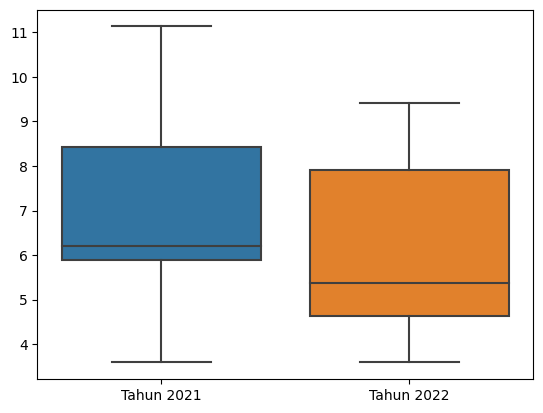

In [ ]:
sns.boxplot(data=df_bps)
plt.show()

In [ ]:
Q1 = df_bps.quantile(0.25, numeric_only=True)
Q3 = df_bps.quantile(0.75, numeric_only=True)
IQR = Q3-Q1
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR
df_bps.shape

(6, 3)

In [ ]:
# Menyusuaikan df dengan lower_fence dan upper_fence
df_bps, lower_fence = df_bps.align(lower_fence, axis=1, copy=False)
df_bps, upper_fence = df_bps.align(upper_fence, axis=1, copy=False)

result = (df_bps < lower_fence) | (df_bps > upper_fence)



#df_bps[(df_bps < lower_fence) | (df_bps > upper_fence)]

# VISUALISASI DATA

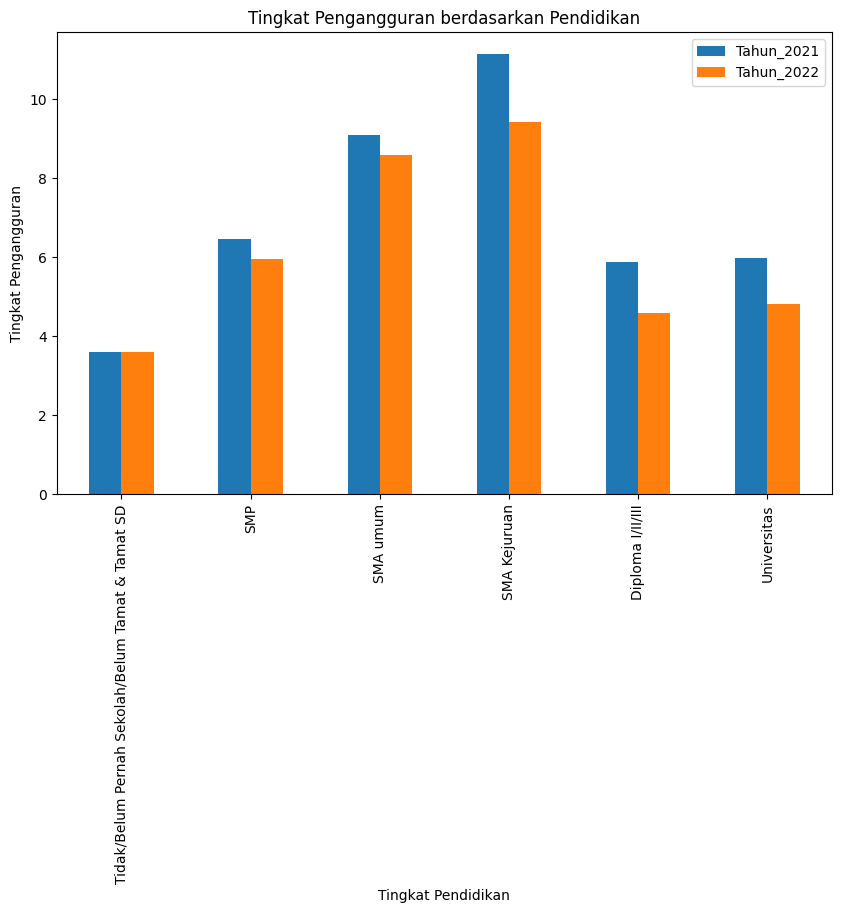

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('pengangguran.csv')

data['Tingkat_Pendidikan'] = ['Tidak/Belum Pernah Sekolah/Belum Tamat & Tamat SD',
                       'SMP',
                       'SMA umum',
                       'SMA Kejuruan',
                       'Diploma I/II/III',
                       'Universitas']

data.set_index('Tingkat_Pendidikan', inplace=True)

data.plot(kind='bar', figsize=(10, 6))
plt.title('Tingkat Pengangguran berdasarkan Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Tingkat Pengangguran')
plt.show()
